In [192]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path

df_result = pd.read_csv('./result.csv')
BASE_INPUT_PATH = Path(f'../kaggle/input/optiver-trading-at-the-close')
REVEALED_TARGETS_FILE = Path(f'{BASE_INPUT_PATH}/revealed_targets.csv')
df_revealed_targets = pd.read_csv(REVEALED_TARGETS_FILE)

In [193]:
df_revealed_targets = df_revealed_targets.dropna(subset=['revealed_date_id', 'seconds_in_bucket', 'stock_id'])
df_revealed_targets['revealed_date_id'] = df_revealed_targets['revealed_date_id'].astype(int).astype(str)
df_revealed_targets['seconds_in_bucket'] = df_revealed_targets['seconds_in_bucket'].astype(str)
df_revealed_targets['stock_id'] = df_revealed_targets['stock_id'].astype(int).astype(str)  # Converting to int first to remove any decimal points

# Concatenate the columns
df_revealed_targets['row_id'] = df_revealed_targets['revealed_date_id'] + '_' + df_revealed_targets['seconds_in_bucket'] + '_' + df_revealed_targets['stock_id']
df_revealed_targets = df_revealed_targets.rename(columns={'revealed_target': 'target'})
df_revealed_targets = df_revealed_targets[['row_id', 'target']]
df_revealed_targets

,row_id,target
0,477_0_0,-2.310276
1,477_0_1,-12.850165
2,477_0_2,-0.439882
3,477_0_3,7.259846
4,477_0_4,4.780292
...,...,...
33103,479_540_195,1.599789
33104,479_540_196,-8.440018
33105,479_540_197,5.149841
33106,479_540_198,-0.249743


In [194]:
df_raw = pd.merge(df_result, df_revealed_targets, how='left', on='row_id')
df_raw = df_raw.dropna(subset=['target'])
df_raw['score'] = (df_raw['base_scaled_pred'] - df_raw['target']).abs()
df_raw['add_score'] = (df_raw['additional_scaled_pred'] - df_raw['target']).abs()
df_raw['avg_score'] = (df_raw['average_scaled_pred'] - df_raw['target']).abs()

#df = df_raw[['row_id', 'seconds_in_bucket', 'stock_id', 'scaled_pred', 'pred', 'target', 'scaled_score', 'score']]
df = df_raw.dropna(subset=['target', 'base_scaled_pred', 'additional_scaled_pred', 'average_scaled_pred', 'score', 'add_score', 'avg_score'])
df

,time_id,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,...,base_pred,base_scaled_pred,additional_pred,additional_scaled_pred,average_pred,average_scaled_pred,target,score,add_score,avg_score
0,26290,0,478,0,3753451.50,-1,0.999875,11548975.0,NaN,NaN,...,-0.136342,-0.213919,-0.103301,-0.187757,-0.119822,-0.200838,-5.429983,5.216064,5.242226,5.229145
1,26290,1,478,0,985977.10,-1,1.000245,3850034.0,NaN,NaN,...,0.570907,0.507200,1.286075,1.216719,0.928491,0.861959,-1.869798,2.376997,3.086516,2.731757
2,26290,2,478,0,599128.75,1,1.000584,4359198.0,NaN,NaN,...,0.737750,0.651779,1.691837,1.598244,1.214793,1.125011,-0.090003,0.741782,1.688247,1.215014
3,26290,3,478,0,2872317.50,-1,0.999802,27129552.0,NaN,NaN,...,-0.122843,-0.193172,-0.167057,-0.243621,-0.144950,-0.218397,-7.609725,7.416553,7.366104,7.391328
4,26290,4,478,0,740059.10,-1,0.999886,8880891.0,NaN,NaN,...,-0.210537,-0.280682,0.115933,0.039569,-0.047302,-0.120556,-3.290176,3.009495,3.329746,3.169620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,26399,195,479,540,815054.60,1,0.999206,43288504.0,0.999918,0.999443,...,0.023801,0.056498,-0.095660,-0.126926,-0.035930,-0.035214,1.599789,1.543291,1.726715,1.635003
21996,26399,196,479,540,541901.50,1,0.999714,9180781.0,1.000961,1.000213,...,0.159191,0.188031,-0.040141,-0.067719,0.059525,0.060156,-8.440018,8.628049,8.372299,8.500174
21997,26399,197,479,540,294082.94,-1,1.000434,21862956.0,1.000151,1.000339,...,-0.140072,-0.118567,-0.383128,-0.403691,-0.261600,-0.261129,5.149841,5.268409,5.553532,5.410971
21998,26399,198,479,540,9540824.00,-1,0.996770,155837700.0,0.995571,0.996051,...,-0.056778,0.006437,-0.323125,-0.383573,-0.189952,-0.188568,-0.249743,0.256181,0.133830,0.061175


In [195]:
df.describe()

/opt/homebrew/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((

,time_id,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,...,base_pred,base_scaled_pred,additional_pred,additional_scaled_pred,average_pred,average_scaled_pred,target,score,add_score,avg_score
count,22000.000000,22000.000000,22000.000000,22000.000000,2.200000e+04,22000.000000,22000.000000,2.200000e+04,9864.000000,10000.000000,...,22000.000000,2.200000e+04,22000.000000,2.200000e+04,22000.000000,2.200000e+04,22000.000000,22000.000000,22000.000000,22000.000000
mean,26344.500000,99.500000,478.500000,270.000000,7.108103e+06,-0.151136,1.000445,5.795580e+07,0.998663,0.998723,...,-0.040990,1.916751e-12,-0.004308,1.445296e-10,-0.022649,1.492109e-11,-0.171779,5.436436,5.427744,5.430507
std,31.753674,57.735617,0.500011,158.748687,2.039415e+07,0.918034,0.001883,1.973132e+08,0.025173,0.013714,...,0.321730,3.214714e-01,0.539320,5.363342e-01,0.410192,4.082866e-01,8.208760,6.100706,6.094082,6.096444
min,26290.000000,0.000000,478.000000,0.000000,0.000000e+00,-1.000000,0.973350,4.316610e+03,0.821585,0.900867,...,-5.540168,-5.523070e+00,-3.567939,-3.900313e+00,-4.234230,-4.233855e+00,-144.379730,0.000010,0.000588,0.000226
25%,26317.000000,49.750000,478.000000,130.000000,3.750441e+05,-1.000000,0.999597,6.388825e+06,0.994998,0.997282,...,-0.129870,-9.257873e-02,-0.296300,-2.861082e-01,-0.211333,-1.842588e-01,-3.932267,1.745929,1.753899,1.747212
50%,26344.500000,99.500000,478.500000,270.000000,1.722701e+06,-1.000000,1.000428,1.432347e+07,1.000030,1.000058,...,-0.044140,-2.431230e-04,-0.028365,-2.189723e-02,-0.037654,-1.228811e-02,-0.060201,3.793469,3.791726,3.783197
75%,26372.000000,149.250000,479.000000,410.000000,5.404606e+06,1.000000,1.001354,3.621761e+07,1.003574,1.002558,...,0.030535,8.135399e-02,0.236367,2.384170e-01,0.129958,1.526237e-01,3.730059,7.170097,7.156336,7.173233
max,26399.000000,199.000000,479.000000,540.000000,4.781548e+08,1.000000,1.009317,2.834017e+09,1.364387,1.102140,...,4.066151,4.062472e+00,4.004777,4.010792e+00,3.965601,4.036632e+00,77.129600,144.606206,144.998114,144.802160


# Score Analysis

In [196]:
# scoreが20以上のデータは対応を考えなければならない
group1 = df[df['scaled_score'] > 20].drop(columns=['score', 'target', 'scaled_pred', 'pred'])
group2 = df[df['scaled_score'] <= 20].drop(columns=['score', 'target', 'scaled_pred', 'pred'])


KeyError: 'scaled_score'

In [ ]:
# 相関を計算
correlation_over_20 = group1.corr()['scaled_score'].sort_values(ascending=False)
correlation_under_20 = group2.corr()['scaled_score'].sort_values(ascending=False)

differences = (correlation_over_20 - correlation_under_20).abs().sort_values(ascending=False).head(10)

# 相関分析に基づいてトップ10の変数を表示
#top_10_correlation_over_20 = correlation_over_20.drop('scaled_score').head(10)
#top_10_correlation_under_20 = correlation_under_20.drop('scaled_score').head(10)

differences

all_sizes_mean              0.351674
matched_size                0.343504
all_sizes_std               0.340720
imbalance_size              0.338157
bid_price                   0.225377
price_pressure              0.218452
wap                         0.215079
near_price_ask_price_imb    0.207537
mid_price                   0.203800
reference_price             0.203430
Name: scaled_score, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 特徴の重要度を計算する関数
def calculate_feature_importance(df):
    X = df.drop('scaled_score', axis=1).fillna(0).replace([np.inf, -np.inf], 0)
    y = df['scaled_score']

    model = RandomForestRegressor()
    model.fit(X, y)

    return pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# それぞれの群に対する特徴の重要度
importance_group1 = calculate_feature_importance(group1)
importance_group2 = calculate_feature_importance(group2)

importance_group1

reference_price                        0.124531
match_balance_diff_5                   0.084848
wap                                    0.054278
matched_size_bid_size_ask_size_imb2    0.049731
all_sizes_skew                         0.043614
                                         ...   
far_price_near_price_imb               0.000124
dow                                    0.000108
far_price_bid_price_imb                0.000074
date_id                                0.000058
currently_scored                       0.000000
Length: 104, dtype: float64

In [ ]:
# 重要な特徴のトップ10を表示
print("Group 1の重要な特徴のトップ10:")
print(importance_group1.head(10))
print("\nGroup 2の重要な特徴のトップ10:")
print(importance_group2.head(10))

Group 1の重要な特徴のトップ10:
reference_price                             0.124531
match_balance_diff_5                        0.084848
wap                                         0.054278
matched_size_bid_size_ask_size_imb2         0.049731
all_sizes_skew                              0.043614
ask_price                                   0.038377
index_mean_wap_diff_7                       0.031563
ask_price_bid_price_reference_price_imb2    0.025703
mid_price                                   0.020417
matched_size                                0.020329
dtype: float64

Group 2の重要な特徴のトップ10:
global_std_price           0.056613
revealed_target            0.021520
seconds_in_bucket          0.020118
row_id                     0.018992
ask_price_bid_price_imb    0.018724
wap_vix_3                  0.017499
wap_vix_7                  0.017131
wap_diff_7                 0.016991
wap_vix_5                  0.016710
revealed_target_diff_3     0.016157
dtype: float64


In [ ]:
# 共通の特徴を特定
common_features = importance_group1.index.intersection(importance_group2.index)

# 特徴の重要度の差を計算
importance_differences = (importance_group1[common_features] - importance_group2[common_features]).abs()

# 差が大きい順に特徴をソート
sorted_features_by_difference = importance_differences.sort_values(ascending=False)

# トップ10を表示
print("影響の差が大きい順の特徴のトップ10:")
sorted_features_by_difference.head(20)

影響の差が大きい順の特徴のトップ10:


reference_price                             0.115041
match_balance_diff_5                        0.074353
wap                                         0.044476
global_std_price                            0.042035
all_sizes_skew                              0.038612
matched_size_bid_size_ask_size_imb2         0.035039
ask_price                                   0.030380
index_mean_wap_diff_7                       0.025197
seconds_in_bucket                           0.014750
mid_price                                   0.014296
ask_price_bid_price_reference_price_imb2    0.013996
wap_vix_7                                   0.013742
wap_vix_3                                   0.012795
all_sizes_std                               0.011897
global_median_price                         0.011000
volume                                      0.010939
all_sizes_mean                              0.010607
revealed_target                             0.009908
wap_diff_7                                  0.

In [ ]:
sorted_features_by_difference.head(25).index

Index(['reference_price', 'match_balance_diff_5', 'wap', 'global_std_price',
       'all_sizes_skew', 'matched_size_bid_size_ask_size_imb2', 'ask_price',
       'index_mean_wap_diff_7', 'seconds_in_bucket', 'mid_price',
       'ask_price_bid_price_reference_price_imb2', 'wap_vix_7', 'wap_vix_3',
       'all_sizes_std', 'global_median_price', 'volume', 'all_sizes_mean',
       'revealed_target', 'wap_diff_7', 'row_id', 'global_ptp_size',
       'reference_price_wap_imb', 'bid_price_wap_reference_price_imb2',
       'stock_id', 'global_median_size'],
      dtype='object')

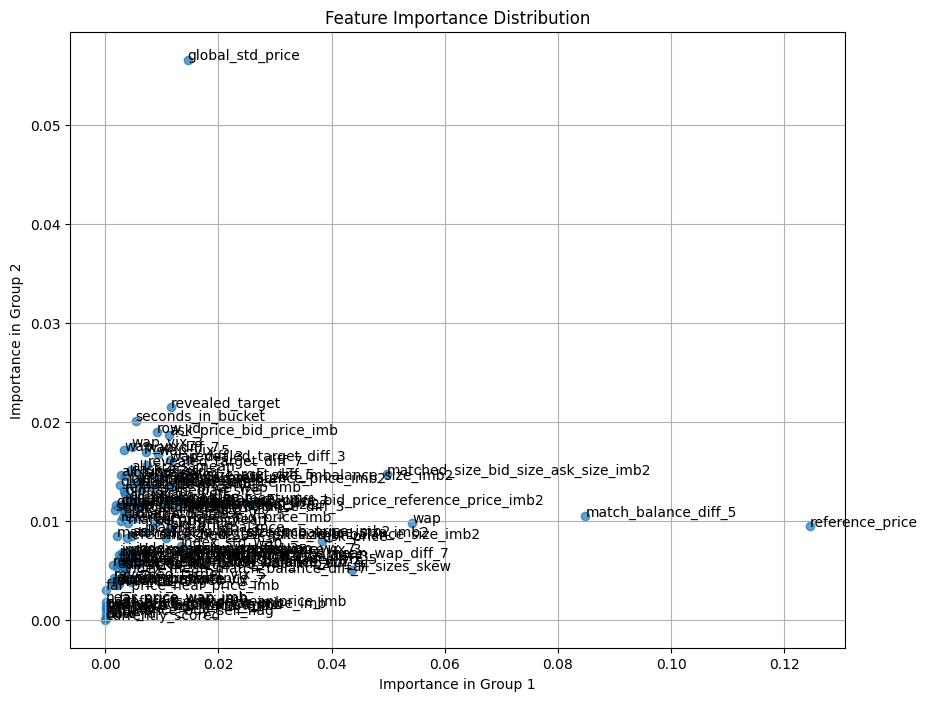

In [ ]:
import matplotlib.pyplot as plt

# 共通の特徴を特定
common_features = importance_group1.index.intersection(importance_group2.index)

# 共通の特徴における重要度をプロット
plt.figure(figsize=(10, 8))
plt.scatter(importance_group1[common_features], importance_group2[common_features], alpha=0.7)
plt.title("Feature Importance Distribution")
plt.xlabel("Importance in Group 1")
plt.ylabel("Importance in Group 2")
plt.grid(True)

# 各点に特徴名をラベルとして追加
for i in common_features:
    plt.text(importance_group1[i], importance_group2[i], i)

plt.show()


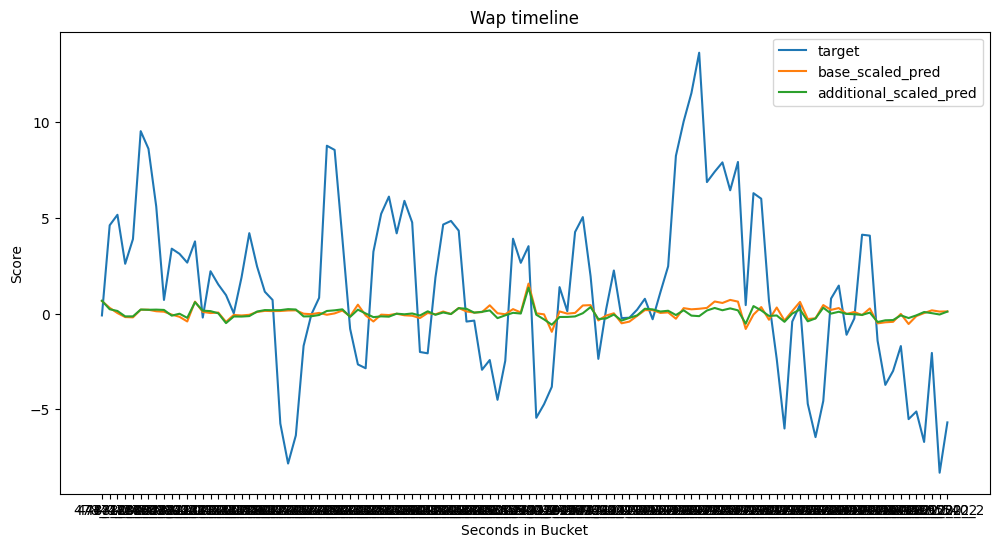

In [ ]:
import matplotlib.pyplot as plt

# 特定の stock_id を選択

df_max_diff = df[df['stock_id'] == 3]
df_max_diff

# グラフ描画
plt.figure(figsize=(12, 6))
# 'base_scaled_pred', 'additional_scaled_pred', 'average_scaled_pred', 
plt.plot(df_max_diff['row_id'], df_max_diff['target'], label='target')
plt.plot(df_max_diff['row_id'], df_max_diff['base_scaled_pred'], label='base_scaled_pred')
plt.plot(df_max_diff['row_id'], df_max_diff['additional_scaled_pred'], label='additional_scaled_pred')
#plt.plot(df_max_diff['row_id'], df_max_diff['add_score'], label='add_score')
#plt.plot(df_max_diff['row_id'], df_max_diff['scaled_score'], label='score')

# グラフのタイトルとラベル設定
plt.title(f'Wap timeline')
plt.xlabel('Seconds in Bucket')
plt.ylabel('Score')
plt.legend()

# グラフ表示
plt.show()

ValueError: setting an array element with a sequence.

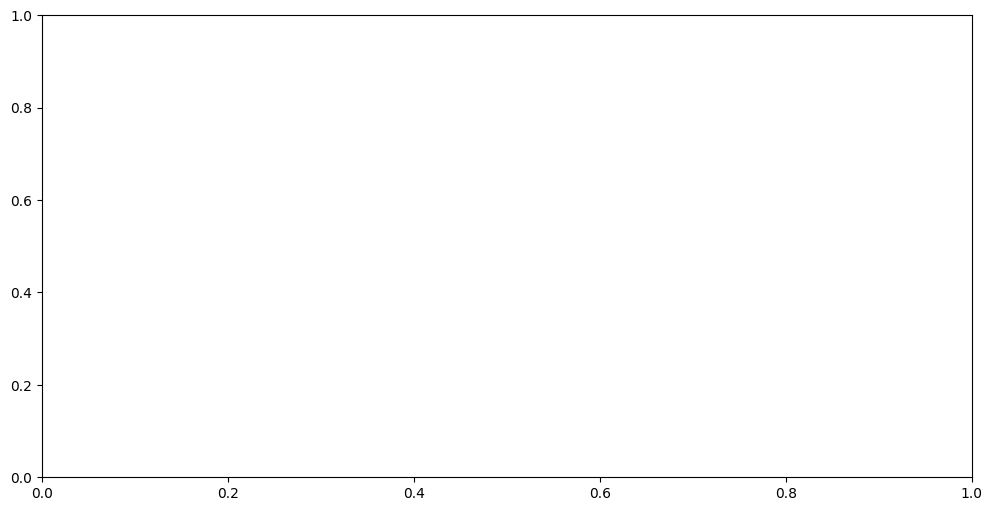

In [ ]:
import matplotlib.pyplot as plt

df_agg_stock_id = df.groupby(['stock_id', 'date_id'])['base_scaled_pred'].mean()

# グラフ描画
plt.figure(figsize=(12, 6))
# df_agg_stock_id.index は 'stock_id' の値を取得します
plt.plot(df_agg_stock_id.index, df_agg_stock_id, label='Average Score')

# グラフのタイトルとラベル設定
plt.title('Stock ID Mean Score')
plt.xlabel('Stock ID')
plt.ylabel('Score')
plt.legend()

# グラフ表示
plt.show()

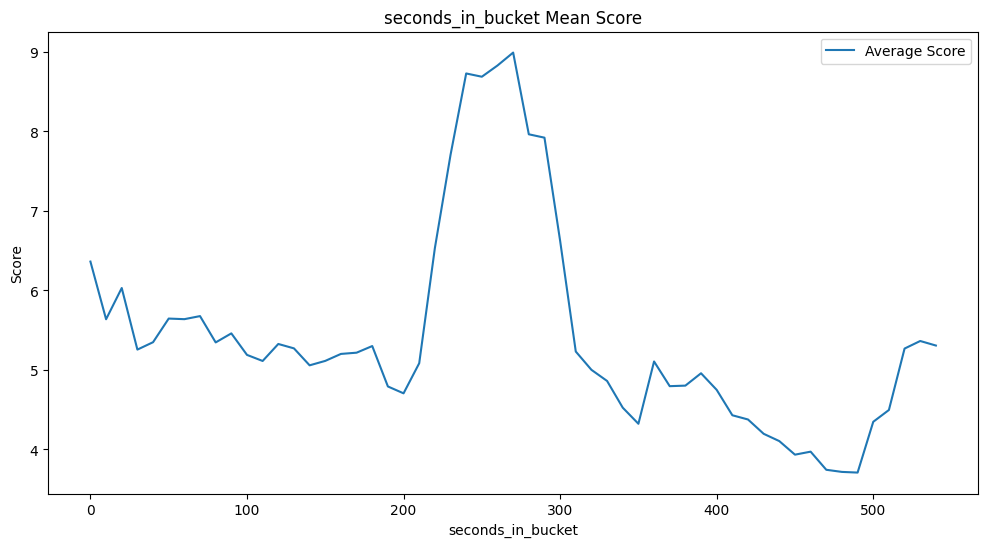

In [ ]:
import matplotlib.pyplot as plt

# 特定の stock_id を選択
df_agg_seconds_in_bucket= df.groupby('seconds_in_bucket')['scaled_score'].mean()

# グラフ描画
plt.figure(figsize=(12, 6))
# df_agg_stock_id.index は 'stock_id' の値を取得します
plt.plot(df_agg_seconds_in_bucket.index, df_agg_seconds_in_bucket, label='Average Score')

# グラフのタイトルとラベル設定
plt.title('seconds_in_bucket Mean Score')
plt.xlabel('seconds_in_bucket')
plt.ylabel('Score')
plt.legend()

# グラフ表示
plt.show()

mean: -0.1717789640360909
std: 8.20875985027079
min: -144.37973
max: 77.1296


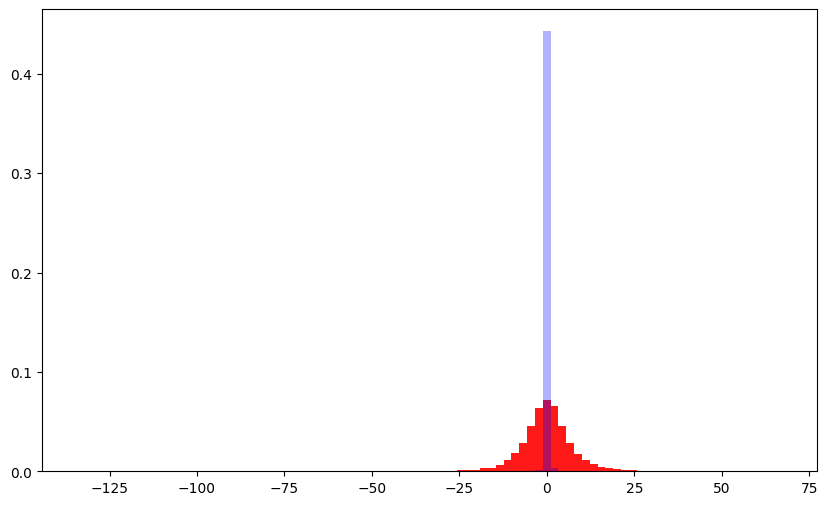

In [ ]:
# Analysys
import matplotlib.pyplot as plt
import numpy as np  # Numerical operations

df_target = df['target']
describe = df_target.describe()

# 平均と標準偏差の取得
mean = describe['mean']
std = describe['std']
print(f"mean: {mean}")
print(f"std: {std}")
print(f"min: {describe['min']}")
print(f"max: {describe['max']}")

# グラフの解像度を高めるための設定
plt.figure(figsize=(10, 6))  # グラフのサイズを大きくする
bins = np.linspace(describe['min'], describe['max'], 100)  # ビンの数を増やして細かく分割

plt.hist(df['target'], bins=bins, alpha=0.9, color='red', density=True)
plt.hist(df['scaled_pred'], bins=bins, alpha=0.3, color='blue', density=True)

# X軸の範囲を絞る
plt.xlim(describe['min'], describe['max'])

# グラフの表示
plt.show()

mean: 5.437256614305569
std: 6.107816664913563
min: 0.0009081385827204025
max: 144.59800178039782


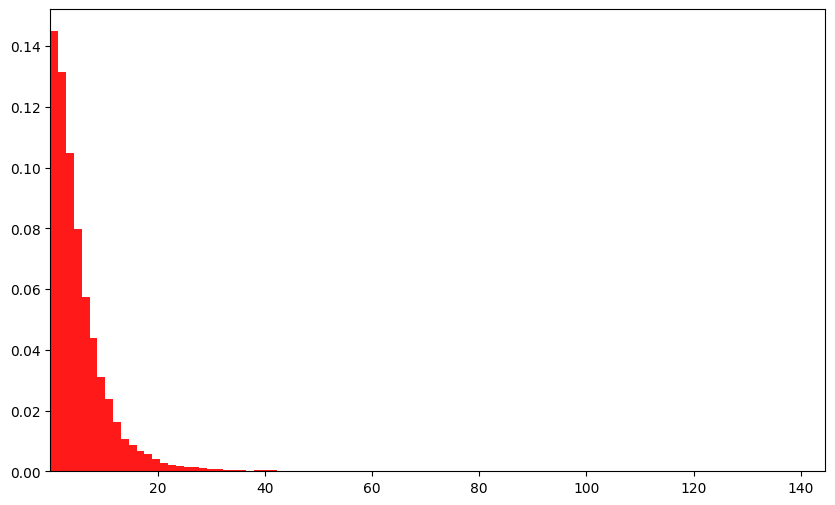

In [ ]:
# Analysys
import matplotlib.pyplot as plt
import numpy as np  # Numerical operations

df_target = df['scaled_score']
describe = df_target.describe()

# 平均と標準偏差の取得
mean = describe['mean']
std = describe['std']
print(f"mean: {mean}")
print(f"std: {std}")
print(f"min: {describe['min']}")
print(f"max: {describe['max']}")

# グラフの解像度を高めるための設定
plt.figure(figsize=(10, 6))  # グラフのサイズを大きくする
bins = np.linspace(describe['min'], describe['max'], 100)  # ビンの数を増やして細かく分割

plt.hist(df['scaled_score'], bins=bins, alpha=0.9, color='red', density=True)

# X軸の範囲を絞る
plt.xlim(describe['min'], describe['max'])

# グラフの表示
plt.show()

In [ ]:
y_min, y_max = -64, 64

# 📉 Define a function to adjust prices based on volumes
def zero_sum(prices, volumes):
    std_error = np.sqrt(volumes)  # 🧮 Calculate standard error based on volumes
    step = np.sum(prices) / np.sum(std_error)  # 🧮 Calculate the step size based on prices and standard error
    out = prices * 0 - std_error * step  # 💰 Adjust prices by subtracting the standardized step size
    return out

def zero_clip(df, predictions):
    # Adjust the predictions based on the order book imbalance
    # 𝐵𝑖𝑑𝑃𝑟𝑖𝑐𝑒∗𝐴𝑠𝑘𝑆𝑖𝑧𝑒+𝐴𝑠𝑘𝑃𝑟𝑖𝑐𝑒∗𝐵𝑖𝑑𝑆𝑖𝑧𝑒𝐵𝑖𝑑𝑆𝑖𝑧𝑒
    zerosum_predictions = zero_sum(predictions, df['bid_size'] + df['ask_size'])
    clipped_predictions = np.clip(zerosum_predictions, y_min, y_max)
    clipped_predictions.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
    clipped_predictions = clipped_predictions.astype('float64').values  
    return clipped_predictions

df_rescaled = df_raw.copy()
df_rescaled['re_scaled_pred'] = zero_clip(df_rescaled, df_rescaled['base_scaled_pred'])
df_rescaled['re_scaled_score'] = (df_rescaled['re_scaled_pred'] - df_rescaled['target']).abs()
df_rescaled['re_scaled_score'].describe()

count    22000.000000
mean         5.436628
std          6.101732
min          0.000032
25%          1.747919
50%          3.793472
75%          7.170420
max        144.628452
Name: re_scaled_score, dtype: float64

In [ ]:
df_rescaled_s.describe()

,stock_id,scaled_pred,pred,re_scaled_pred,target,scaled_score,score,re_scaled_score
count,22000.000000,2.200000e+04,22000.000000,2.200000e+04,22000.000000,22000.000000,22000.000000,22000.000000
mean,99.500000,-1.050669e-10,-0.054661,3.875688e-18,-0.171779,5.437257,5.438536,5.438934
std,57.735617,2.794991e-01,0.279413,2.810392e-01,8.208760,6.107817,6.106994,6.108492
min,0.000000,-2.069294e+00,-2.034321,-1.986899e+00,-144.379730,0.000908,0.000108,0.000048
25%,49.750000,-1.055434e-01,-0.160168,-1.061329e-01,-3.932267,1.751421,1.749680,1.751687
50%,99.500000,-2.616388e-03,-0.060409,-3.172466e-03,-0.060201,3.790726,3.796407,3.789396
75%,149.250000,9.108171e-02,0.027357,9.045515e-02,3.730059,7.173476,7.164427,7.171273
max,199.000000,2.006543e+00,2.023744,2.068336e+00,77.129600,144.598002,144.582111,144.611222


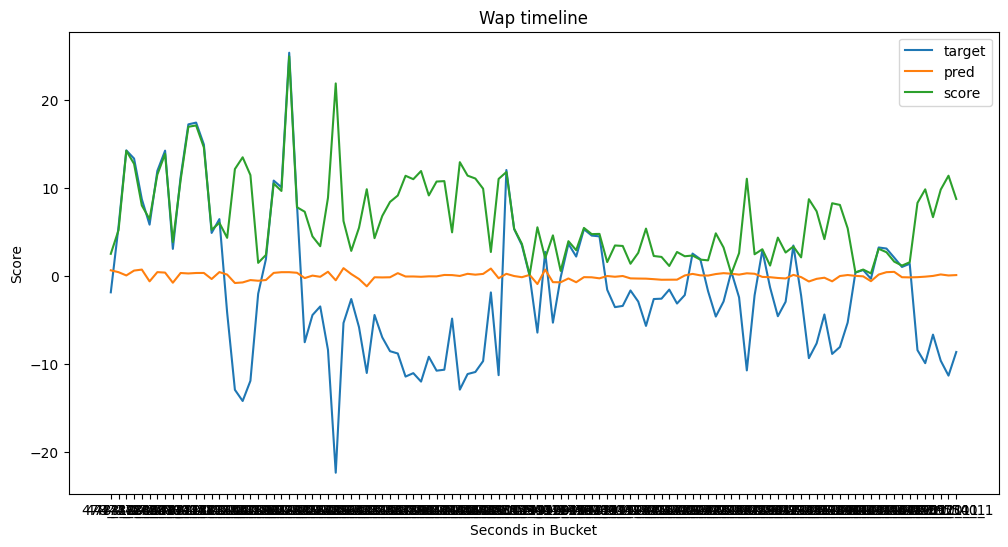

In [ ]:
import matplotlib.pyplot as plt

# 特定の stock_id を選択

df_max_diff = df_rescaled_s[df_rescaled_s['stock_id'] == 1]
df_max_diff

# グラフ描画
plt.figure(figsize=(12, 6))
plt.plot(df_max_diff['row_id'], df_max_diff['target'], label='target')
plt.plot(df_max_diff['row_id'], df_max_diff['re_scaled_pred'], label='pred')
plt.plot(df_max_diff['row_id'], df_max_diff['re_scaled_score'], label='score')

# グラフのタイトルとラベル設定
plt.title(f'Wap timeline')
plt.xlabel('Seconds in Bucket')
plt.ylabel('Score')
plt.legend()

# グラフ表示
plt.show()

In [ ]:
# Check df_cache_with_features

df_cache_with_features = pd.read_csv('./df_cache_with_features.csv')
df_cache_with_features = df_cache_with_features[df_cache_with_features['stock_id'] == 1]
df_cache_with_features.to_csv('./df_cache_with_features_stock_id_1.csv')

FileNotFoundError: [Errno 2] No such file or directory: './df_cache_with_features.csv'

In [ ]:
# Check df_cache_with_features

df_train = pd.read_csv('./df_train.csv')
df_train = df_train[df_train['stock_id'] == 1]
df_train = df_train[df_train['date_id'] == 479]
df_train.to_csv('./df_train_id_1.csv')